In [34]:
from portfolioqtopt.simulation.simulation import Simulation
from numpy.polynomial import Polynomial as P
import typing

polys: typing.Dict[int, P] = {}
roots: typing.Dict[int, float] = {}

daily_returns = [0.2]
expected_return = 0.1
+
for n in range(2, 20):
    polys[n] = Simulation.get_log_taylor_series(daily_returns, expected_return, n)
    roots[n] = Simulation.get_root(polys[n], 0.1, 0.3)

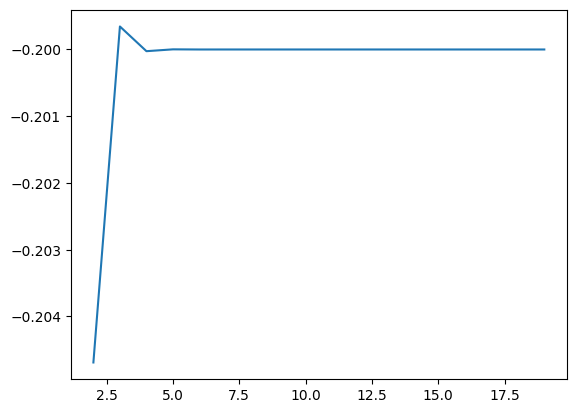

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    np.array(list(roots.keys()), np.int8),
    (np.array(list(roots.values())) - expected_return),
);

Observe the serie convergence

-4.27e-03, 3.13e-04, -2.31e-05, 1.85e-06, -1.54e-07, 1.31e-08, -1.15e-09, 1.02e-10, -9.17e-12, 8.33e-13, -7.63e-14, 7.06e-15, -6.11e-16, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

/tmp/ipykernel_19973/623378097.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(diffs)));


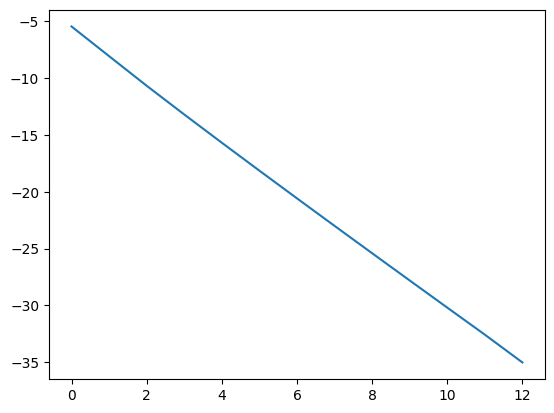

In [50]:
import numpy as np

diffs = []

for n in range(2, 20):
    diff = np.array(
        [np.log(p) for p in np.array(daily_returns, np.float64) + 1 + roots[n]]
    ).sum() - np.log(1 + expected_return)
    print(f"{diff:.2e}", end=", ")
    diffs.append(diff)

plt.plot(np.log(np.abs(diffs)));
# We observe a convergence logaritmic as stand by o(x^n)